# Making Predictions using Decision Trees

## Basic concept and terminology

Machine learning models (of which decision trees are one specific type), are functions that map an input to an output.

* The input (variables) are sometimes referred to as features with the features representing an object. If you take a human as an object, then this human can have features, such as 'height', 'weight', 'gender', ... For a person `i`, these features are usually denoted by a vector `x_i`. If you take multiple humen, then you obtain a matrix `X` with each row representing one human.
* The output (variable) can be a class, such as being diabetic/non-diabetic. This class is usually denoted by `y_i` for person `i`. Classes of multiple persons is denoted by a vector `y` --- in the case of diabetes, this vector could look like (1, 1, 1, 0, 0, 0, 1, 0, ...) with 1 denoting diabetes and 0 denoting no diabetes. We would call this a (binary) classification task.

Now, a machine learning model `f` tries to find a function that maps the human's features `x_i` to the corresponding class, `y_i`, i.e.,

`f(x_i) --> y_i`.

As the output `y` can also be seen as the target of the machine learning model, `y` is also referred to as the target variable. Further, `y_i` is often named the label of `x_i`.

Additional information: The output can also be a continuous value, then we say that this machine learning problem is a regression task.

The goal of decision trees (DTs) is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the inputs.

We use decision trees every day from childhood, when we need to choose one option from many possible variants. For example, this could be a possible decision tree for deciding on evening plans:

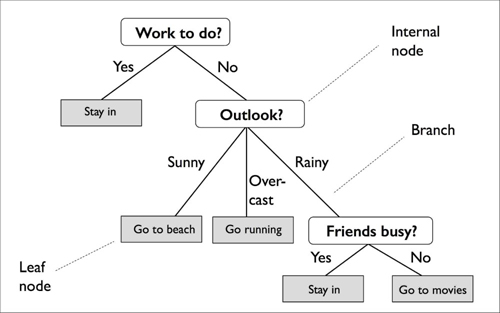

However, decision trees can be used not only for classification (to stay in or to go running), but for regression tasks as well, meaning that we can predict continious values, like how many km to run on the specific day.

## Implementing Decision Trees with Python Scikit Learn
## Decision Tree for Classification
As a classification task we want to predict whether a banknote is authentic or fake depending upon four different attributes of the image of the note ([link to the dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)).

First we need to import necessary python libraries, load and inspect the data (most likely we will need to brush it up a bit). Let's start with pandas and numpy, to read in the data and apply numerical operations if necessary.

In [3]:
import pandas as pd
import numpy as np

### Preparing the data
#### Exercise
**1.** Put the data_banknote_authentication.txt file to your python environment (in the subfolder `data/` when using Jupyter Notebook or upload it to google colab )

**2.** Have a look at the columns a.k.a. features of the banknotes.


In [5]:
# solution
df = pd.read_csv('data/data_banknote_authentication.txt', names=['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class'])

print(df.shape)
print(df.columns)

(1372, 5)
Index(['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class'], dtype='object')


If you are curious how these features were extracted from photos of the banknotes, check the [Wavelet transform](https://towardsdatascience.com/what-is-wavelet-and-how-we-use-it-for-data-science-d19427699cef) out. But simply speaking we convert each image into a distribution of its pixels and extract some statistics about the distribution:

*  Variance - measure of variability or spread of the distribution;
*   Skewness - measure of symmetry of a distribution. In normal distributions skewness = 0. Distribution skewed to the right  (a.k.a positive skewed) will have a longer right tail and to the left (negative skew) a longer left tail (longer tails occur because of outliers);
*   Kurtosis - measures how "thick" are the tails of the distribution;
* Entropy - measure of uncertainty.

But don't get confused by the features - that's not the important thing in this exercise.

We also have a fifth column `Class`. That looks like the target, that we want to predict. Indeed, class 1 stands for "genuine banknote" and class 0 for "fake banknote".


**3.** As always, after loading the data check it for meaningfulness and consistency. Have a look at the basic statictics for each column and try to spot suspicious data points, that can affect our further manipulations with data and results of a prediction. Also use plots, such as box-plots to identify outliers. If you don't recall box-plots, check the previous exercise again.

Hint: You can use `dataframe.describe()` function for having a brief summary on the data. Once you spot unusual points, delete them for now (in one of the next exercises, we will also impute them, so we replace the outliers or NaNs with for instance the mean value within the respective column). If you detect outliers in one of the columns, you can try to remove the points which are more then three standard deviations away from the mean:

```
banknotes = banknotes[banknotes[column] <= 3*banknotes[column].std()]
banknotes = banknotes[banknotes[column] >= -3*banknotes[column].std()]
```

But don't take this as a general rule. Only apply this if you see that there are outliers based on the box-plot!!!

In [7]:
# solutions

print(df.describe())
print(df.dtypes)


          Variance     Skewness     Kurtosis      Entropy        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
Variance    float64
Skewness    float64
Kurtosis    float64
Entropy     float64
Class         int64
dtype: object


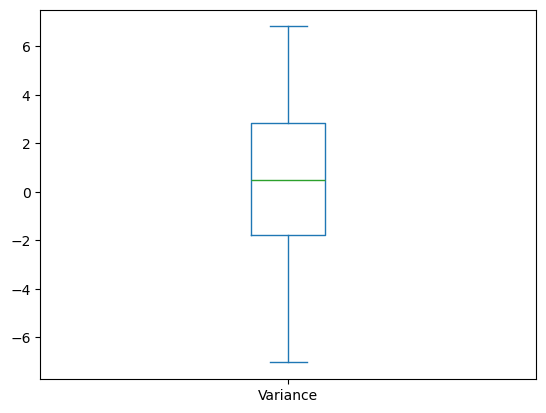

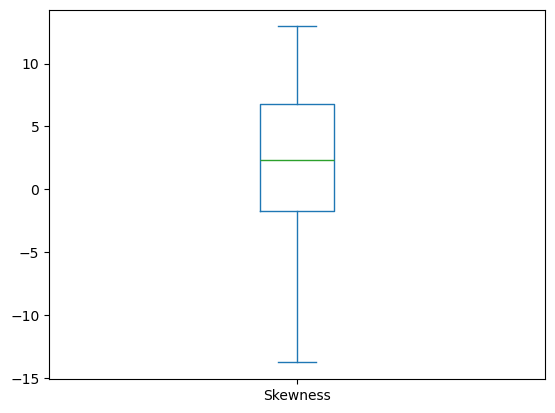

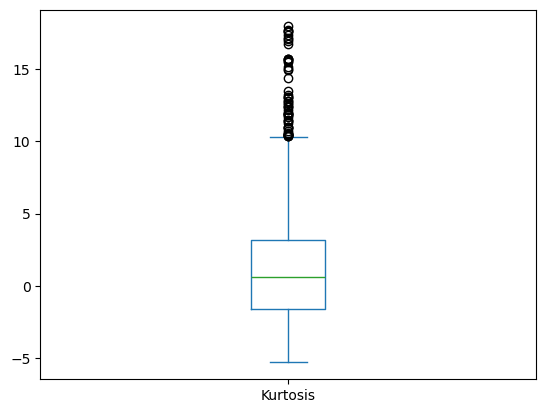

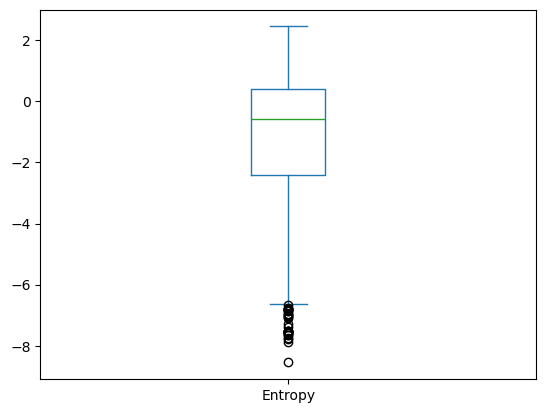

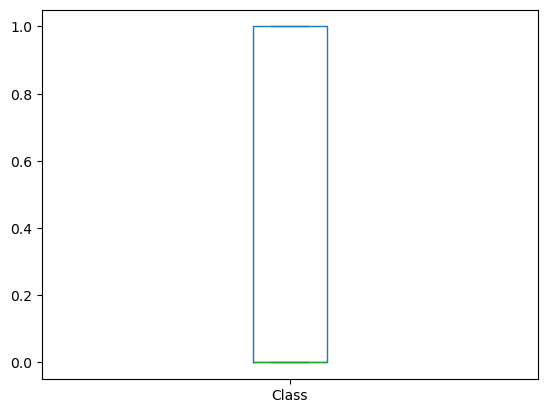

In [9]:
# solutions
import matplotlib.pyplot as plt

for c in df.columns:
  df[c].plot.box()
  plt.show()

#### Exercise
Great, we are almost ready to train the decision tree! The last dirty work that we need to make is to separate features from labels. For that create dataframe `X`, where you store features, and dataframe `y` with labels. Hint: to cut off some columns use the `dataframe.drop('Column', axis=1)` function.

In [13]:
# solutions
X = df.drop('Class', axis=1).copy()
y = df['Class'].copy()

### Training and Making Predictions
To implement a decision tree we will use the Scikit-Learn `tree` library, which contains built-in classes/methods for various decision tree algorithms. More specifically we will use the `DecisionTreeClassifier` class for this example, as we deal with a classification problem. The `fit` method of this class is called to train the algorithm on the data, which is passed as a parameter to the fit method. Execute the following script to train the algorithm:

In [139]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 2)
classifier.fit(X, y)

DecisionTreeClassifier(max_depth=2)

Woooooow!!! That's it, we just trained a machine learning model. Quite easy right? It doesn't stay exactly that easy for all models but the large majority can be trained simply by calling a `fit` method.

Now that our classifier has been trained, let's make predictions. To make predictions, the `predict` method of the `DecisionTreeClassifier` class is used. Take a look at the following code for usage:

In [141]:
y_pred = classifier.predict(X)

That was fast, right? We built a decision tree of depth = 2, meaning that there are two steps or "branches" on our way from a "root node" to a "leaf node" (have a look at the picture from the very beginning of this notebook if you don't recall what these terms stand for).

</br> Now let's have a look at the decision tree. For this, we first import a function `plot_tree`.

In [143]:
from sklearn.tree import plot_tree

Now, we can plot the decision tree that we just trained.

[Text(0.5, 0.8333333333333334, 'Variance <= 0.32\ngini = 0.494\nsamples = 1372\nvalue = [762, 610]\nclass = Fake'),
 Text(0.25, 0.5, 'Skewness <= 7.565\ngini = 0.306\nsamples = 657\nvalue = [124, 533]\nclass = Genuine'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.131\nsamples = 552\nvalue = [39, 513]\nclass = Genuine'),
 Text(0.375, 0.16666666666666666, 'gini = 0.308\nsamples = 105\nvalue = [85, 20]\nclass = Fake'),
 Text(0.75, 0.5, 'Kurtosis <= -4.386\ngini = 0.192\nsamples = 715\nvalue = [638, 77]\nclass = Fake'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.363\nsamples = 42\nvalue = [10, 32]\nclass = Genuine'),
 Text(0.875, 0.16666666666666666, 'gini = 0.125\nsamples = 673\nvalue = [628, 45]\nclass = Fake')]

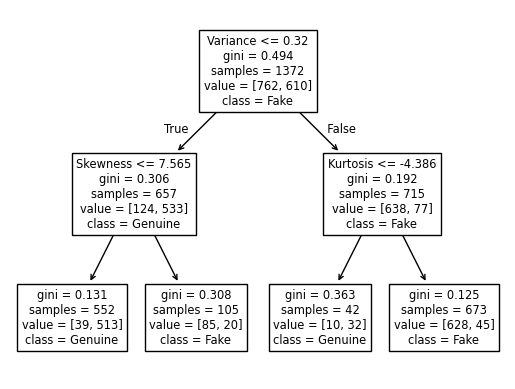

In [145]:
plot_tree(classifier, feature_names=X.columns, class_names=['Fake', 'Genuine'])

#### Exercise

Nice, can you figure out, how the decision tree makes a prediction? Try to copy the functionality using a normal python function `my_decision_tree`. This function should get four parameters `var`, `skew`, `curtosis`, `entropy` --- the features. The function then uses `if` and `else` statements to compute the prediction `y` which is then returned by the function.

In [ ]:
def my_decision_tree(var, skew, curtosis, entropy):
  if var <= 0.32:
    if skew <= 7.565:
      return 1
    else:
      return 0
  else:
    if curtosis <= -4.386:
      return 1
    else:
      return 0

### Evaluating the Algorithm
We want to see how accurate our decision tree is (the Scikit Learn one, not our function). For classification tasks a confusion matrix is usually a good starting point to get an overview.

In the first column, the confusion matrix shows the prediction quality for the prediction of class 0. In the second column, the matrix shows the prediction quality for the prediction of class 1.

On the other hand, in the first row, the matrix shows the prediction quality for true classes 0. In the second row, the matrix shows the prediction quality for the true classes 1.

The confusion matrix shows a lot of information, however it is also not easy to understand. Have a look at https://en.wikipedia.org/wiki/Confusion_matrix if you are unsure.

You can also have a look at the following picture to make things clearer:
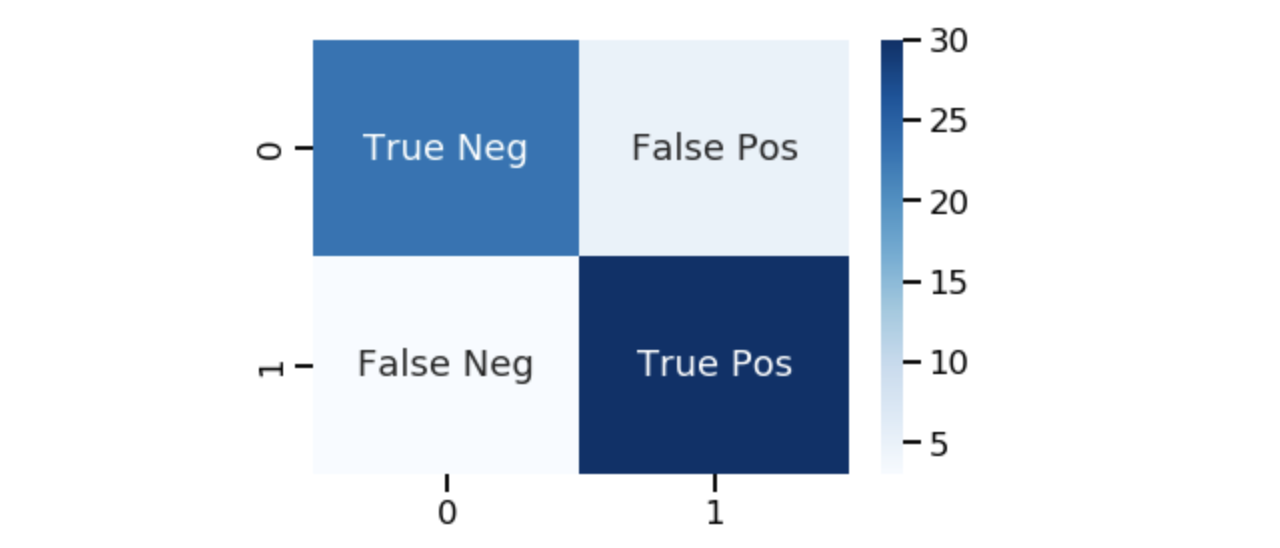

For evaluation, we always have to first make predictions in order to assess how well these predictions are actually made. Let's start with that (you have seen this function call previously as well):

In [121]:
y_pred = classifier.predict(X)

Next, we can use this prediction of our Decision Tree and compare it with the target values (y).

In [123]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(confusion_matrix(y, y_pred))

[[713  49]
 [ 65 545]]


#### Exercise
1. Looking at the confusion matrix try to explain, what does each number tell? Discuss in the group.
2. Knowing the number of True Positive (TP) and True Negative (TN) you can now calculate the accuracy of the model using the following formula: `Acc = (TN + TP)/ (N_all)`, where `N_all` is the total number of samples.
3. Now use the function `accuracy_score(y, y_pred)` and compare your accuracy level.

In [147]:
# solutions
conf_mat = confusion_matrix(y, y_pred)
TP = conf_mat[0,0]
TN = conf_mat[1,1]
N_all = np.sum(conf_mat)
print((TN + TP) / N_all)

print(accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

0.9169096209912536
0.9169096209912536
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       762
           1       0.92      0.89      0.91       610

    accuracy                           0.92      1372
   macro avg       0.92      0.91      0.92      1372
weighted avg       0.92      0.92      0.92      1372



#### Exercise
As a last step here try to change the max_depth parameter for a decision tree and look how the classification results evolve.

In [153]:
# solutions
classifier = DecisionTreeClassifier(max_depth = 10)
classifier.fit(X, y)

y_pred = classifier.predict(X)
print(accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       762
           1       1.00      1.00      1.00       610

    accuracy                           1.00      1372
   macro avg       1.00      1.00      1.00      1372
weighted avg       1.00      1.00      1.00      1372



## Decision Tree for Regression
The process of solving regression problems with decision trees using Scikit Learn is very similar to that of classification. However for regression we use the `DecisionTreeRegressor` class of the tree library. Also the evaluation metrics for regression differ from those of classification (what should an accuracy be for continuous values?). The rest of the process is almost the same.

### Preparing the data
For this part of the exercise we will use the [petrol consumption](https://people.sc.fsu.edu/~jburkardt/datasets/regression/x16.txt) dataset to try to predict gas consumptions (in millions of gallons) in 48 US states based upon gas tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with a drivers license.
#### Exercise
1. Load the petrol_consumption.csv file and have a look at its content. There shouldn't be any missing values or things that need to be fixed.
2. As in the previous task split the dataframe into features and labels (use `X` and `y` dataframes)

In [ ]:
# solutions
df = pd.read_csv('data/petrol_consumption.csv')
print(df.isnull().sum())
print(df.describe())

X = df.drop('Petrol_Consumption', axis=1).copy()
y = df['Petrol_Consumption'].copy()

###  Training and Making Predictions
As mentioned earlier, for a regression task we'll use a different sklearn class than we did for the classification task. The class we'll be using here is the `DecisionTreeRegressor` class, as opposed to the `DecisionTreeClassifier` from before.
</br> To train the tree, we'll instantiate the `DecisionTreeRegressor` class and call the `fit` method.


#### Exercise
Make a decision tree using `DecisionTreeRegressor` class and predict fuel consumption (use `y_pred` for predictions).

In [ ]:
# solutions
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X, y)

y_pred = regressor.predict(X)

Now let's compare some of our predicted values with the actual values and see how accurate we were:

In [ ]:
df=pd.DataFrame({'Actual':y, 'Predicted':y_pred})
print(df)

###Exercise
Probably, it looks quite good, but let's visualize the decision tree as we did before. If you did not set the max_depth of the decision tree, it will simply continue to split until all samples (rows in our X matrix) are predicted perfectly.

In [ ]:
# solutions
plot_tree(regressor, feature_names=X.columns)

### Evaluating the Algorithm
To evaluate performance of the regression algorithm, the commonly used metrics are mean absolute error, mean squared error, and root mean squared error. The Scikit-Learn library contains functions that can help calculate these values for us. To do so, use this code from the `metrics` package:

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

### Exercise
Now change the `max_depth` of our `DecisionTreeRegressor` and look how the error changes.

In [ ]:
# solutions
regressor = DecisionTreeRegressor(max_depth=10)
regressor.fit(X, y)

y_pred = regressor.predict(X)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))